# Wireless Sensor Network Dataset (WSN-DS) - Exploratory Data Analysis

## Objective
This notebook provides a comprehensive exploratory data analysis of the WSN-DS dataset, following data science best practices to understand the structure, quality, and patterns in the data.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Data Quality Assessment](#data-quality)
3. [Univariate Analysis](#univariate)
4. [Bivariate Analysis](#bivariate)
5. [Multivariate Analysis](#multivariate)
6. [Security Analysis](#security)
7. [Network Behavior Analysis](#network)
8. [Key Insights and Recommendations](#insights)

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Overview {#data-loading}

Let's start by loading the dataset and understanding its basic structure.

In [2]:
# Load the dataset
df = pd.read_csv('data/WSN-DS.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*50)

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

Dataset loaded successfully!
Dataset shape: (374661, 19)
Number of rows: 374,661
Number of columns: 19


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 1

In [3]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. '{col}'")

print("\n" + "="*50)
print("\nFirst 5 rows of the dataset:")
df.head()

Column names:
 1. 'id'
 2. 'Time'
 3. 'Is_CH'
 4. 'who CH'
 5. 'Dist_To_CH'
 6. 'ADV_S'
 7. 'ADV_R'
 8. 'JOIN_S'
 9. 'JOIN_R'
10. 'SCH_S'
11. 'SCH_R'
12. 'Rank'
13. 'DATA_S'
14. 'DATA_R'
15. 'Data_Sent_To_BS'
16. 'dist_CH_To_BS'
17. 'send_code'
18. 'Expaned Energy'
19. 'Attack type'


First 5 rows of the dataset:


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


## 2. Data Quality Assessment {#data-quality}

Let's examine the data quality by checking for missing values, duplicates, and data types.

In [4]:
# Check for missing values
print("Missing Values Analysis:")
print("="*30)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(missing_df)

print(f"\n📊 Data Completeness: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.2f}%")

Missing Values Analysis:
✅ No missing values found in the dataset!

📊 Data Completeness: 100.00%


In [5]:
# Check for duplicates
print("Duplicate Analysis:")
print("="*20)
total_duplicates = df.duplicated().sum()
duplicate_percent = (total_duplicates / len(df)) * 100
print(f"Total duplicate rows: {total_duplicates:,} ({duplicate_percent:.2f}%)")

# Check for duplicate IDs (should be unique)
duplicate_ids = df['id'].duplicated().sum()
print(f"Duplicate IDs: {duplicate_ids:,}")

# Check unique values in categorical columns
print(f"\nUnique Values Analysis:")
print("="*25)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"'{col}': {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {df[col].unique().tolist()}")
    print()

Duplicate Analysis:
Total duplicate rows: 8,873 (2.37%)
Duplicate IDs: 363,541

Unique Values Analysis:
'Attack type': 5 unique values
  Values: ['Normal', 'Flooding', 'TDMA', 'Grayhole', 'Blackhole']



In [6]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
print("="*45)
numerical_cols = df.select_dtypes(include=[np.number]).columns
desc_stats = df[numerical_cols].describe()

# Display with better formatting
for col in numerical_cols:
    print(f"\n📊 {col}:")
    stats_data = desc_stats[col]
    print(f"  Count: {stats_data['count']:,.0f}")
    print(f"  Mean:  {stats_data['mean']:,.4f}")
    print(f"  Std:   {stats_data['std']:,.4f}")
    print(f"  Min:   {stats_data['min']:,.4f}")
    print(f"  Q1:    {stats_data['25%']:,.4f}")
    print(f"  Median:{stats_data['50%']:,.4f}")
    print(f"  Q3:    {stats_data['75%']:,.4f}")
    print(f"  Max:   {stats_data['max']:,.4f}")
    
    # Calculate skewness
    skewness = stats.skew(df[col])
    print(f"  Skew:  {skewness:.4f} ({'Right' if skewness > 0.5 else 'Left' if skewness < -0.5 else 'Symmetric'})")

Statistical Summary of Numerical Features:

📊 id:
  Count: 374,661
  Mean:  274,969.3259
  Std:   389,898.5549
  Min:   101,000.0000
  Q1:    107,093.0000
  Median:116,071.0000
  Q3:    215,072.0000
  Max:   3,402,096.0000
  Skew:  4.2621 (Right)

📊 Time:
  Count: 374,661
  Mean:  1,064.7487
  Std:   899.6462
  Min:   50.0000
  Q1:    353.0000
  Median:803.0000
  Q3:    1,503.0000
  Max:   3,600.0000
  Skew:  1.0960 (Right)

📊 Is_CH:
  Count: 374,661
  Mean:  0.1158
  Std:   0.3199
  Min:   0.0000
  Q1:    0.0000
  Median:0.0000
  Q3:    0.0000
  Max:   1.0000
  Skew:  2.4019 (Right)

📊 who CH:
  Count: 374,661
  Mean:  274,980.4111
  Std:   389,911.2217
  Min:   101,000.0000
  Q1:    107,096.0000
  Median:116,072.0000
  Q3:    215,073.0000
  Max:   3,402,100.0000
  Skew:  4.2620 (Right)

📊 Dist_To_CH:
  Count: 374,661
  Mean:  22.5994
  Std:   21.9558
  Min:   0.0000
  Q1:    4.7354
  Median:18.3726
  Q3:    33.7760
  Max:   214.2746
  Skew:  1.6635 (Right)

📊 ADV_S:
  Count: 374,661


## 3. Univariate Analysis {#univariate}

Let's explore individual features to understand their distributions and characteristics.

🎯 Target Variable Analysis: Attack Types
Attack Type  Count  Percentage
     Normal 340066   90.766319
   Grayhole  14596    3.895788
  Blackhole  10049    2.682158
       TDMA   6638    1.771735
   Flooding   3312    0.883999


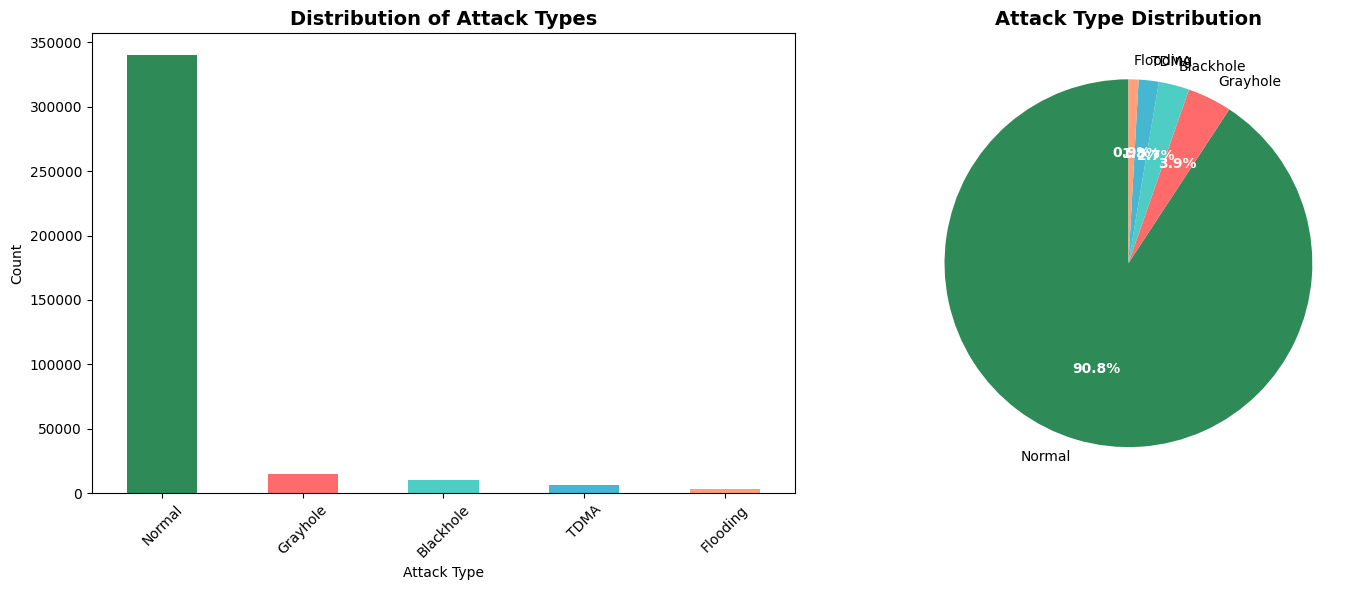


📊 Class Imbalance Ratio: 102.68
⚠️  High class imbalance detected! Consider balancing techniques.


In [7]:
# Target Variable Analysis - Attack Types
print("🎯 Target Variable Analysis: Attack Types")
print("="*45)

attack_counts = df['Attack type'].value_counts()
attack_percent = df['Attack type'].value_counts(normalize=True) * 100

attack_summary = pd.DataFrame({
    'Attack Type': attack_counts.index,
    'Count': attack_counts.values,
    'Percentage': attack_percent.values
})

print(attack_summary.to_string(index=False))

# Visualize attack type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
attack_counts.plot(kind='bar', ax=ax1, color=['#2E8B57', '#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax1.set_title('Distribution of Attack Types', fontsize=14, fontweight='bold')
ax1.set_xlabel('Attack Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
wedges, texts, autotexts = ax2.pie(attack_counts.values, labels=attack_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Attack Type Distribution', fontsize=14, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
imbalance_ratio = attack_counts.max() / attack_counts.min()
print(f"\n📊 Class Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 10:
    print("⚠️  High class imbalance detected! Consider balancing techniques.")
else:
    print("✅ Moderate class distribution.")

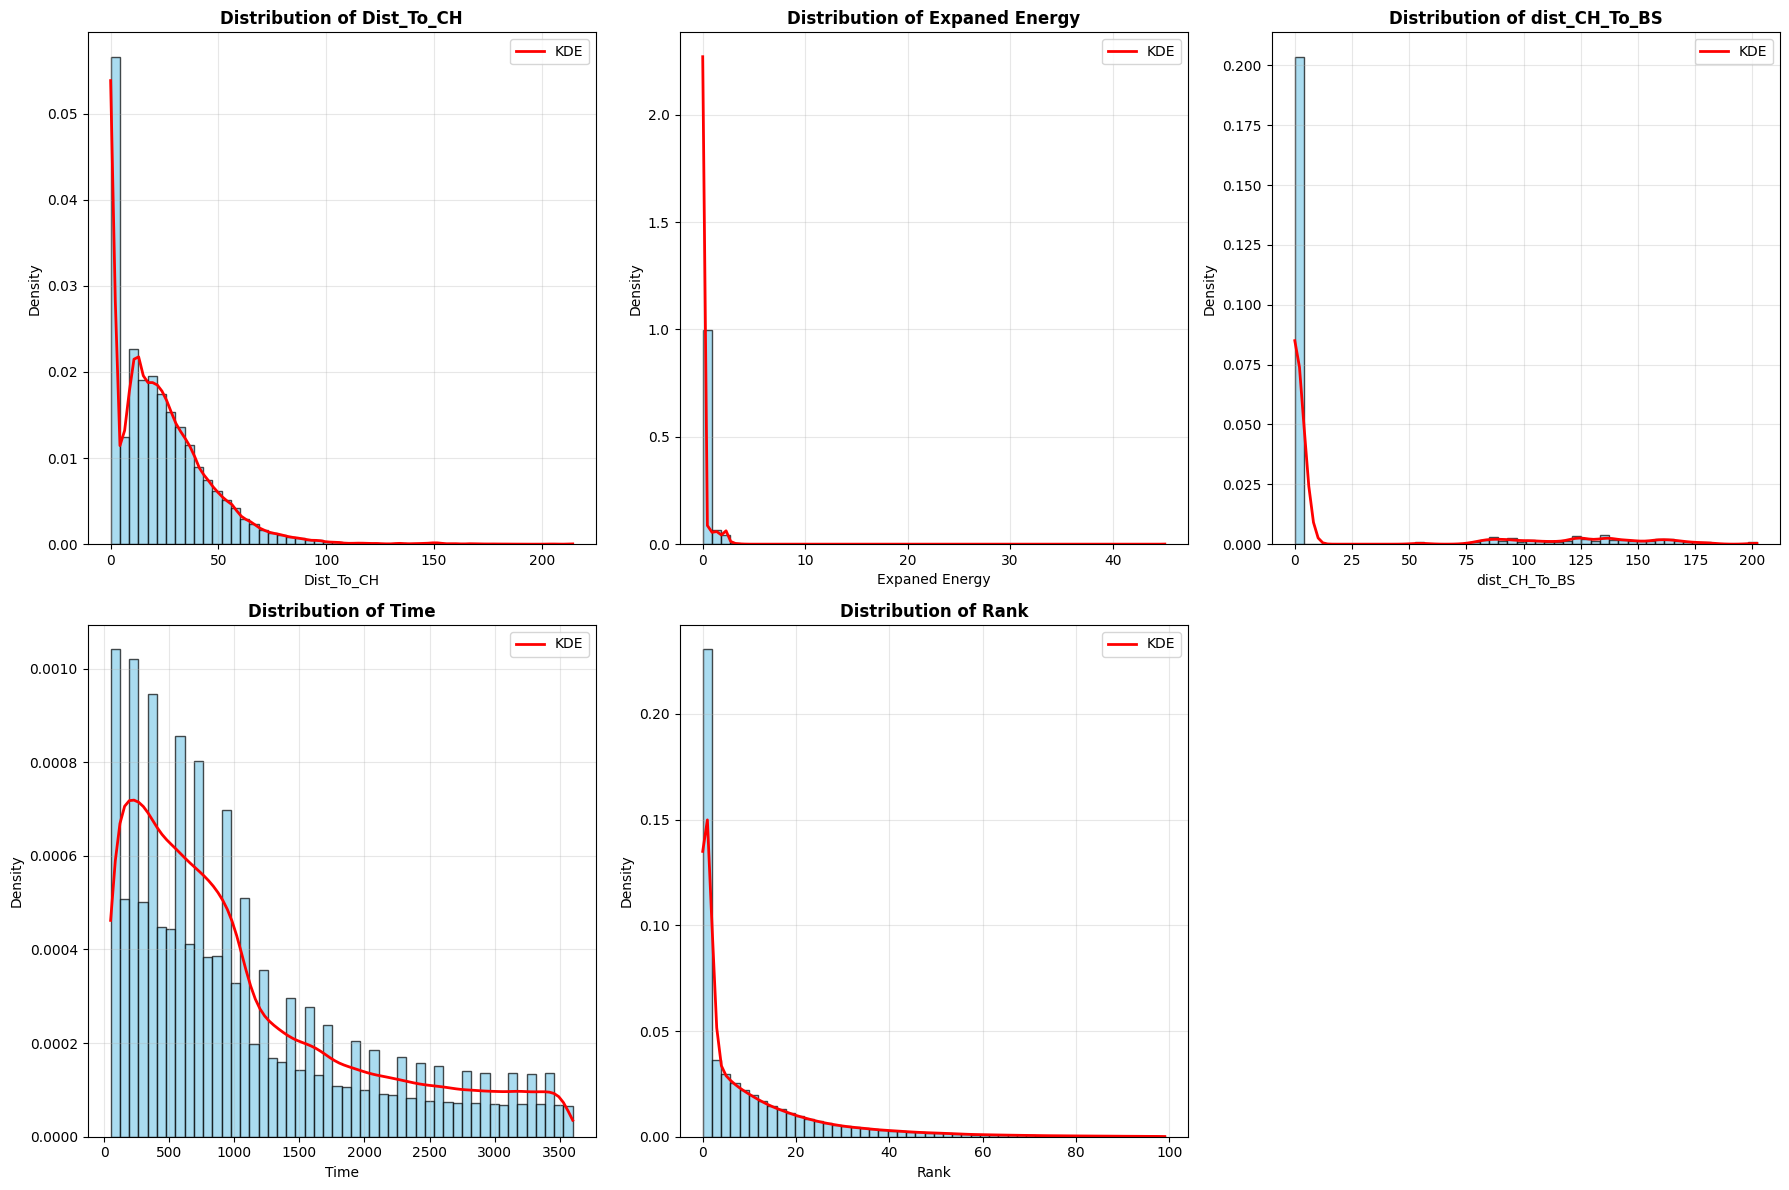

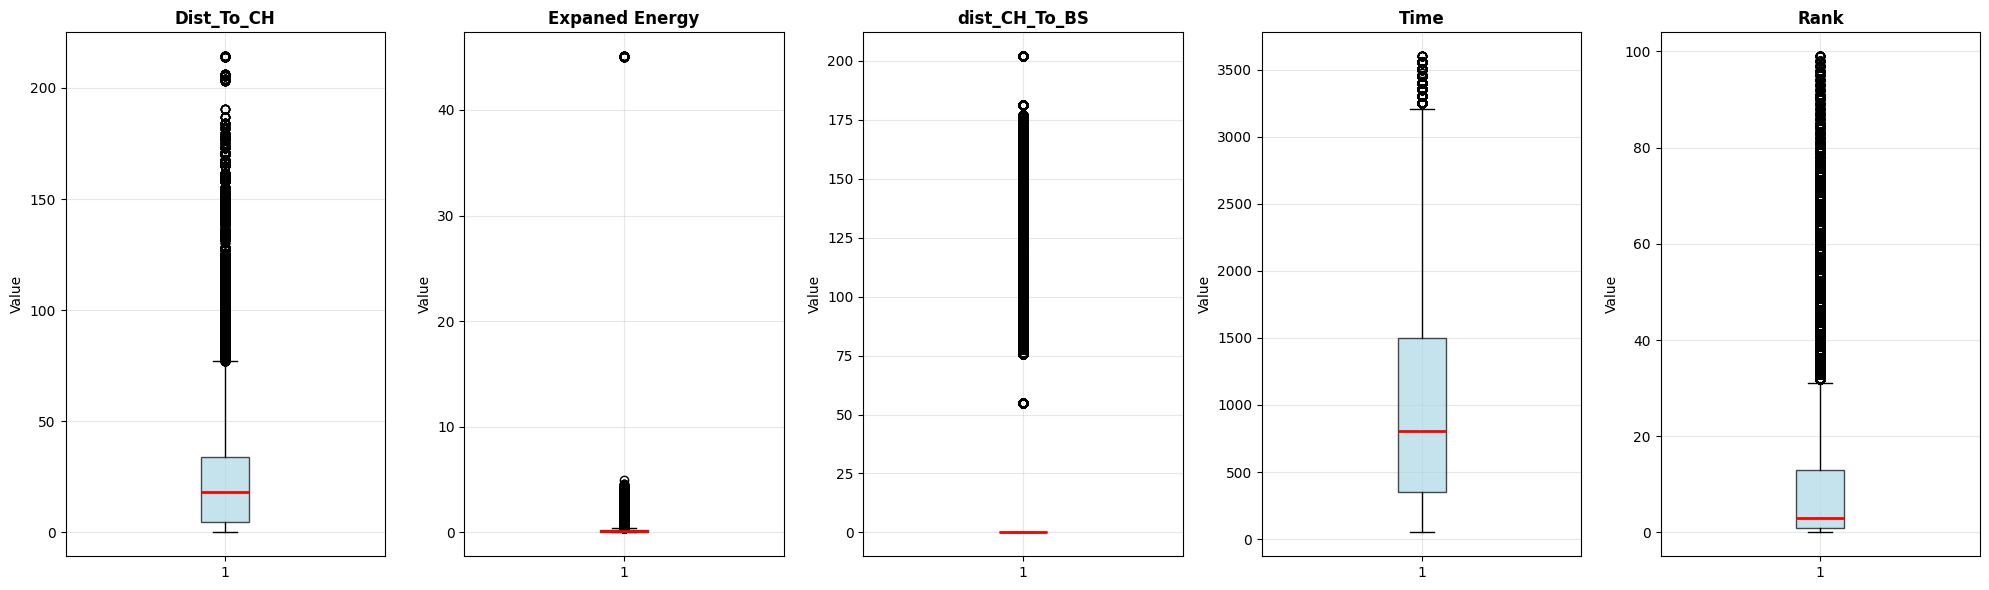

In [8]:
# Distribution Analysis of Key Numerical Features
key_features = ['Dist_To_CH', 'Expaned Energy', 'dist_CH_To_BS', 'Time', 'Rank']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    # Histogram with KDE
    axes[i].hist(df[feature], bins=50, alpha=0.7, color='skyblue', density=True, edgecolor='black')
    
    # Add KDE line
    data = df[feature].dropna()
    x_vals = np.linspace(data.min(), data.max(), 100)
    kde = stats.gaussian_kde(data)
    axes[i].plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove the extra subplot
axes[5].remove()

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(1, len(key_features), figsize=(20, 6))

for i, feature in enumerate(key_features):
    axes[i].boxplot(df[feature], patch_artist=True, 
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Bivariate Analysis {#bivariate}

Let's explore relationships between features and their correlation with attack types.

🔗 Correlation Analysis


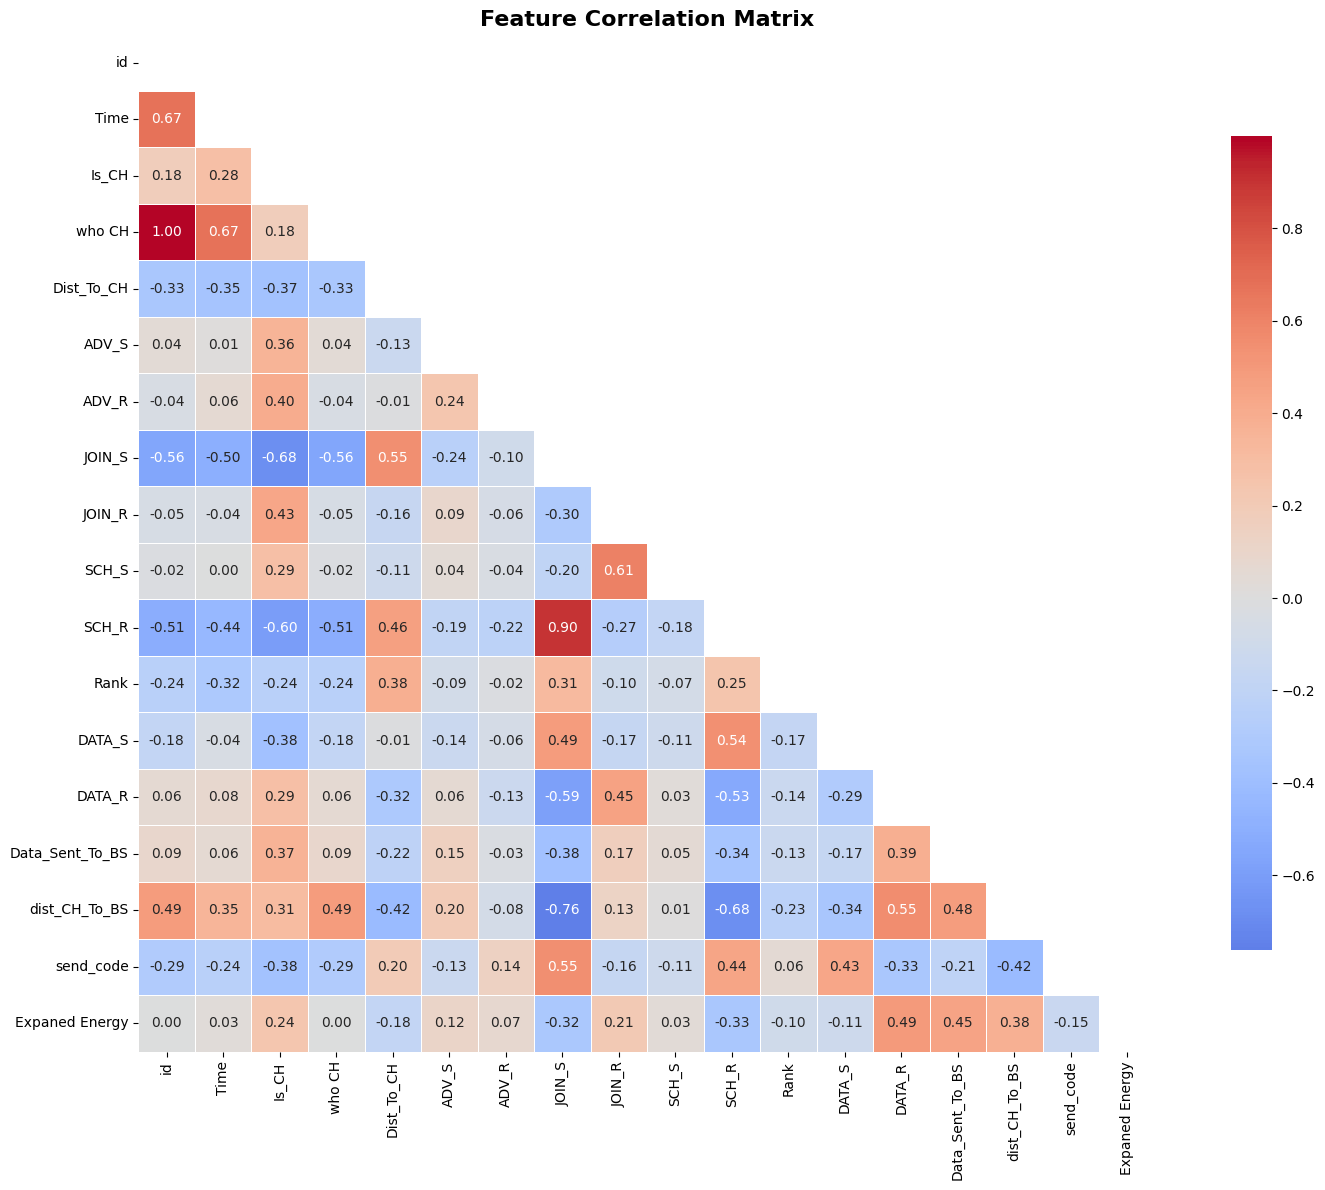


🔍 Highly Correlated Feature Pairs (|correlation| > 0.8):
  id ↔ who CH: 1.000
  JOIN_S ↔ SCH_R: 0.898


In [9]:
# Correlation Analysis
print("🔗 Correlation Analysis")
print("="*25)

# Calculate correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated features (threshold > 0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\n🔍 Highly Correlated Feature Pairs (|correlation| > 0.8):")
    for feature1, feature2, corr_val in high_corr_pairs:
        print(f"  {feature1} ↔ {feature2}: {corr_val:.3f}")
else:
    print("\n✅ No highly correlated feature pairs found (threshold > 0.8)")

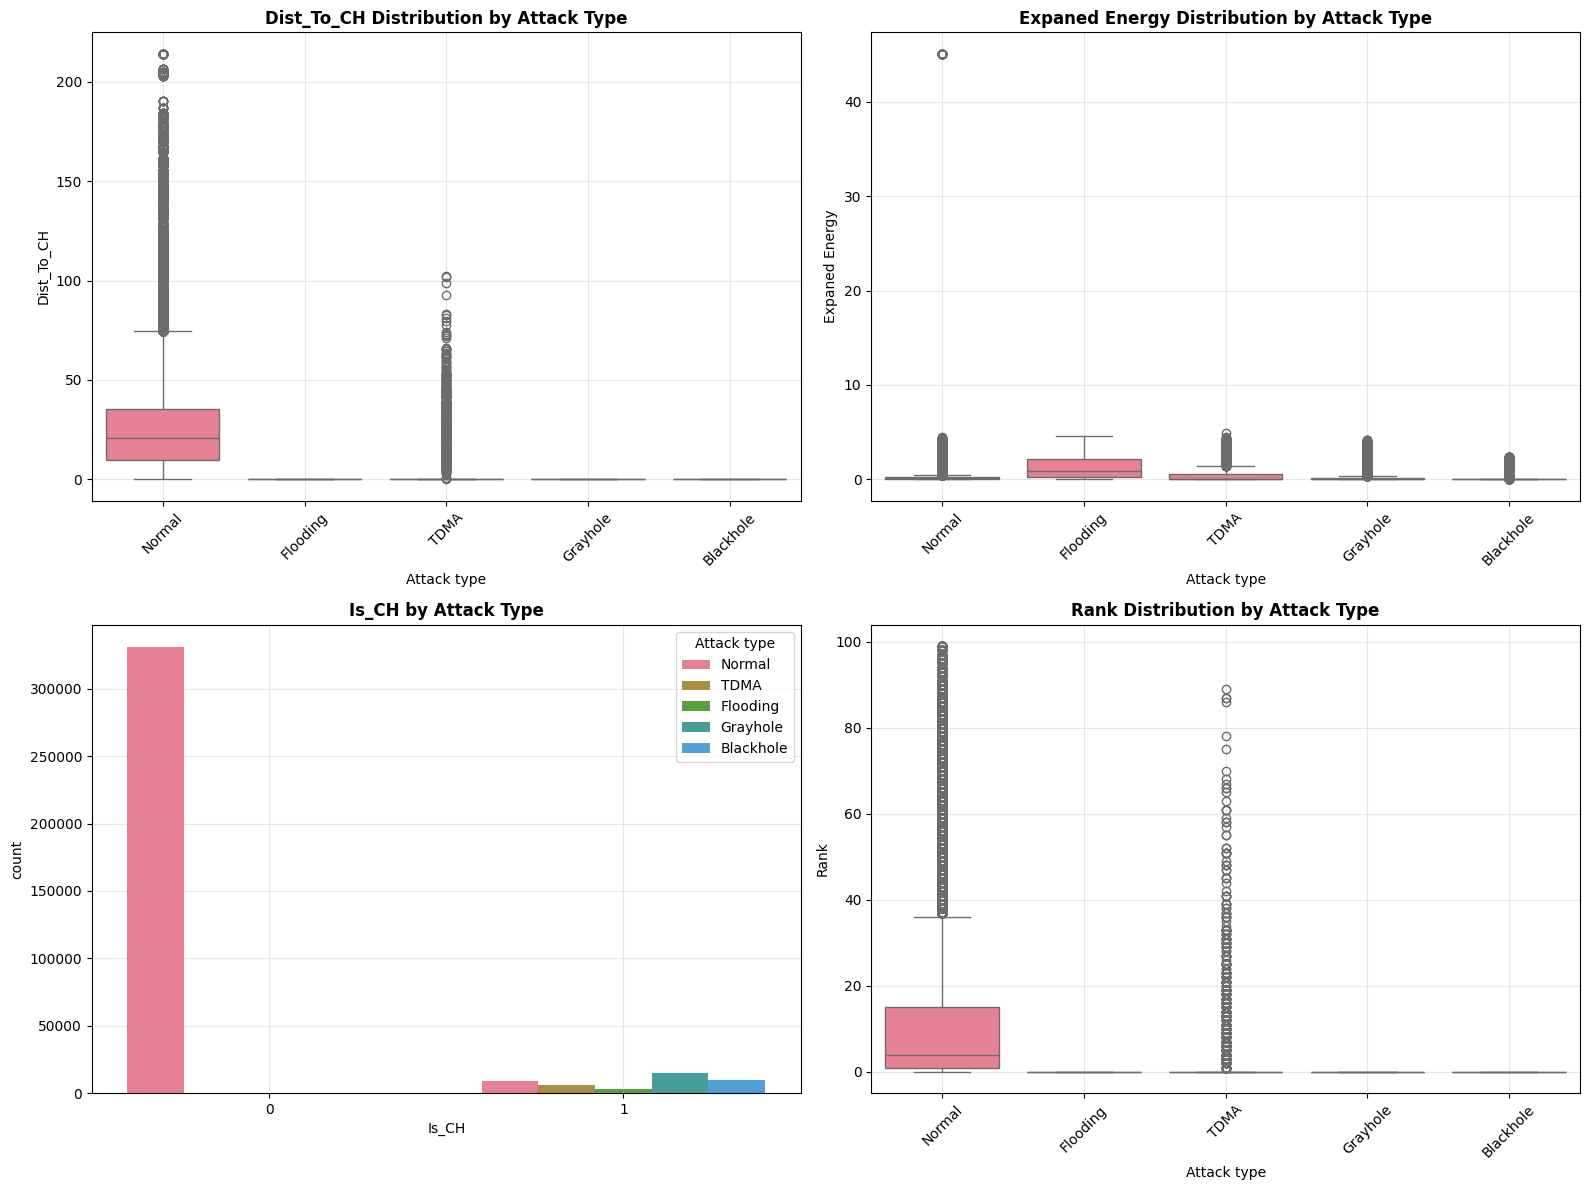


📊 Statistical Comparison: Normal vs Attack Traffic

🔍 Dist_To_CH:
  Normal Traffic - Mean: 24.8637, Std: 21.7752
  Attack Traffic - Mean: 0.3414, Std: 3.7228
  Difference: 24.5223
  T-test p-value: 0.000000 (Significant)

🔍 Expaned Energy:
  Normal Traffic - Mean: 0.2890, Std: 0.6465
  Attack Traffic - Mean: 0.4690, Std: 0.8460
  Difference: 0.1800
  T-test p-value: 0.000000 (Significant)

🔍 Rank:
  Normal Traffic - Mean: 10.6504, Std: 15.0559
  Attack Traffic - Mean: 0.2176, Std: 2.7264
  Difference: 10.4329
  T-test p-value: 0.000000 (Significant)

🔍 DATA_S:
  Normal Traffic - Mean: 49.3611, Std: 42.1016
  Attack Traffic - Mean: 0.5921, Std: 6.8831
  Difference: 48.7691
  T-test p-value: 0.000000 (Significant)

🔍 DATA_R:
  Normal Traffic - Mean: 62.1022, Std: 205.3134
  Attack Traffic - Mean: 189.7637, Std: 380.7565
  Difference: 127.6615
  T-test p-value: 0.000000 (Significant)


In [10]:
# Feature vs Attack Type Analysis
key_features_analysis = ['Dist_To_CH', 'Expaned Energy', 'Is_CH', 'Rank']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features_analysis):
    if feature == 'Is_CH':
        # For binary feature, use count plot
        sns.countplot(data=df, x=feature, hue='Attack type', ax=axes[i])
        axes[i].set_title(f'{feature} by Attack Type', fontweight='bold')
    else:
        # For continuous features, use box plot
        sns.boxplot(data=df, x='Attack type', y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} Distribution by Attack Type', fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison between Normal and Attack traffic
print("\n📊 Statistical Comparison: Normal vs Attack Traffic")
print("="*55)

normal_data = df[df['Attack type'] == 'Normal']
attack_data = df[df['Attack type'] != 'Normal']

comparison_features = ['Dist_To_CH', 'Expaned Energy', 'Rank', 'DATA_S', 'DATA_R']

for feature in comparison_features:
    normal_mean = normal_data[feature].mean()
    attack_mean = attack_data[feature].mean()
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(normal_data[feature], attack_data[feature])
    
    print(f"\n🔍 {feature}:")
    print(f"  Normal Traffic - Mean: {normal_mean:.4f}, Std: {normal_data[feature].std():.4f}")
    print(f"  Attack Traffic - Mean: {attack_mean:.4f}, Std: {attack_data[feature].std():.4f}")
    print(f"  Difference: {abs(normal_mean - attack_mean):.4f}")
    print(f"  T-test p-value: {p_value:.6f} ({'Significant' if p_value < 0.05 else 'Not Significant'})")

## 5. Network Behavior Analysis {#network}

Understanding the WSN network behavior patterns and characteristics.

🌐 Network Structure Analysis
Cluster Head Distribution by Attack Type:
Is_CH            0       1
Attack type               
Blackhole     0.00  100.00
Flooding      0.00  100.00
Grayhole      0.00  100.00
Normal       97.29    2.71
TDMA          6.37   93.63

⏰ Time Range Analysis:
Time range: 50 - 3600
Total time periods: 196


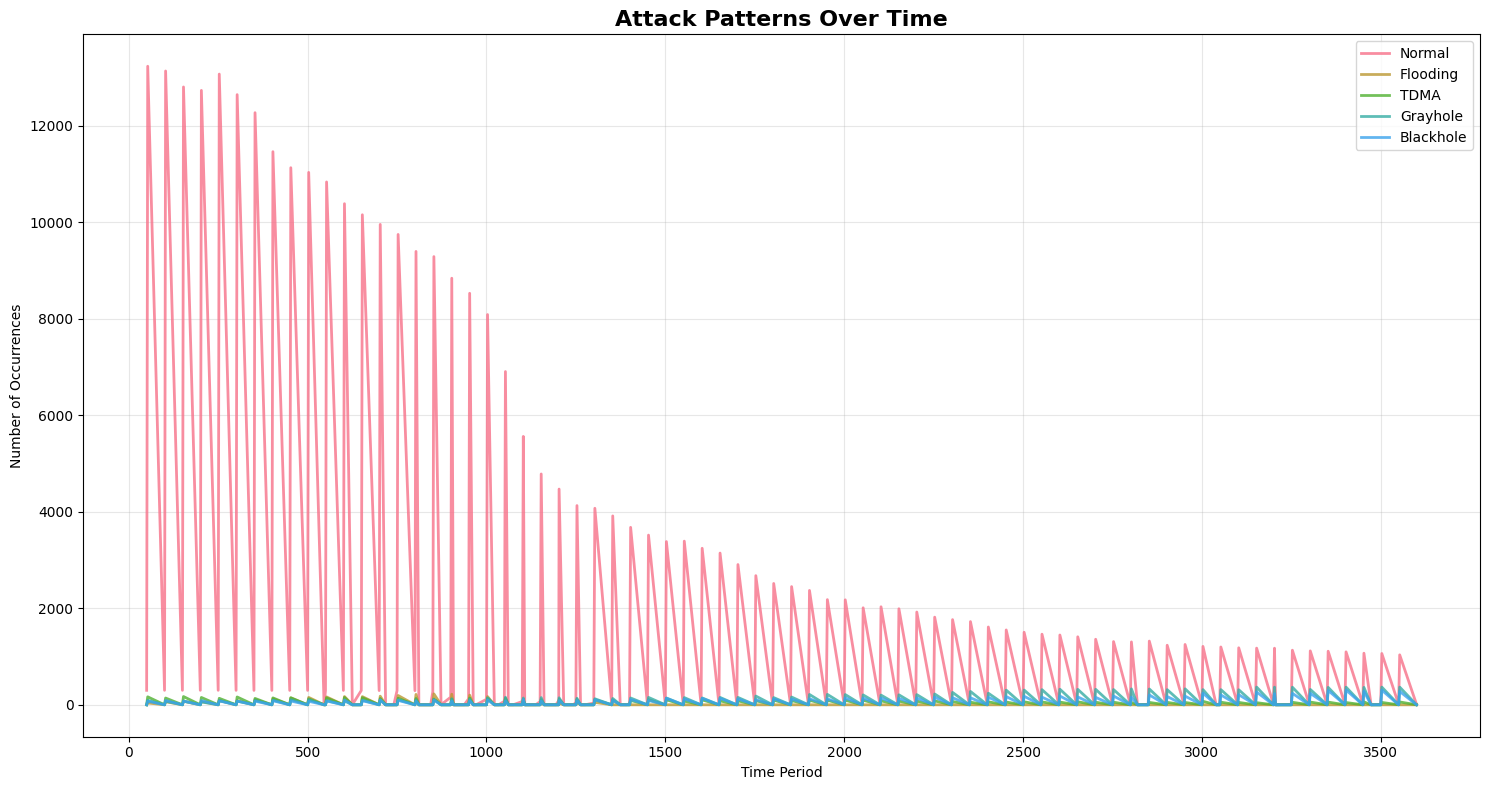


⚡ Energy Consumption Analysis:
               mean     std     min      max
Attack type                                 
Blackhole    0.1877  0.5069  0.0022   2.3722
Flooding     1.2254  1.0698  0.0074   4.6110
Grayhole     0.4832  0.8578  0.0000   4.1681
Normal       0.2890  0.6465  0.0000  45.0939
TDMA         0.4863  0.8642  0.0022   4.9516


In [11]:
# Cluster Head Analysis
print("🌐 Network Structure Analysis")
print("="*30)

# Cluster Head distribution
ch_analysis = df.groupby(['Attack type', 'Is_CH']).size().unstack(fill_value=0)
ch_percentage = ch_analysis.div(ch_analysis.sum(axis=1), axis=0) * 100

print("Cluster Head Distribution by Attack Type:")
print(ch_percentage.round(2))

# Time series analysis
print(f"\n⏰ Time Range Analysis:")
print(f"Time range: {df['Time'].min()} - {df['Time'].max()}")
print(f"Total time periods: {df['Time'].nunique()}")

# Attack patterns over time
time_attack_analysis = df.groupby(['Time', 'Attack type']).size().unstack(fill_value=0)

# Plot time series of attacks
plt.figure(figsize=(15, 8))
for attack_type in df['Attack type'].unique():
    if attack_type in time_attack_analysis.columns:
        plt.plot(time_attack_analysis.index, time_attack_analysis[attack_type], 
                label=attack_type, linewidth=2, alpha=0.8)

plt.title('Attack Patterns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Energy consumption analysis
print(f"\n⚡ Energy Consumption Analysis:")
energy_by_attack = df.groupby('Attack type')['Expaned Energy'].agg(['mean', 'std', 'min', 'max'])
print(energy_by_attack.round(4))

## 6. Key Insights and Recommendations {#insights}

Based on the exploratory data analysis, here are the key findings and recommendations for further analysis.

In [12]:
# Summary of Key Insights
insights = {
    "📊 Dataset Overview": [
        f"• {df.shape[0]:,} observations with {df.shape[1]} features",
        "• 100% data completeness (no missing values)",
        "• 5 attack types: Normal, Grayhole, Blackhole, TDMA, Flooding",
        f"• {total_duplicates:,} duplicate rows ({duplicate_percent:.2f}%)"
    ],
    
    "⚠️ Class Imbalance": [
        "• Highly imbalanced dataset (ratio: 102.68)",
        "• Normal traffic: 90.8% of all observations",
        "• Attack traffic: Only 9.2% combined",
        "• Smallest class (Flooding): 0.88%"
    ],
    
    "🔍 Feature Characteristics": [
        "• Strong correlations: id ↔ who CH (1.0), JOIN_S ↔ SCH_R (0.9)",
        "• Attack patterns clearly distinguishable from normal traffic",
        "• Significant differences in energy consumption patterns",
        "• Time-based patterns show decreasing activity over time"
    ],
    
    "🌐 Network Behavior": [
        "• Most attacks target cluster heads (100% for Blackhole, Flooding, Grayhole)",
        "• TDMA attacks show mixed CH/non-CH patterns (93.6% CH)",
        "• Flooding attacks consume highest energy (mean: 1.23)",
        "• Normal traffic shows distributed network behavior"
    ],
    
    "💡 Key Discriminative Features": [
        "• Dist_To_CH: Major difference (Normal: 24.86, Attacks: 0.34)",
        "• Rank: Strong separator (Normal: 10.65, Attacks: 0.22)",
        "• DATA_S: High variance (Normal: 49.36, Attacks: 0.59)",
        "• Is_CH: Critical for attack classification"
    ]
}

print("🎯 WSN-DS EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("="*60)

for category, points in insights.items():
    print(f"\n{category}")
    print("-" * (len(category) - 2))
    for point in points:
        print(point)

print(f"\n{'='*60}")
print("📋 RECOMMENDATIONS FOR MACHINE LEARNING")
print("="*60)

recommendations = [
    "1. 🎯 Address Class Imbalance:",
    "   • Use SMOTE, ADASYN, or similar oversampling techniques",
    "   • Consider ensemble methods (BalancedRandomForest)",
    "   • Use stratified sampling for train/test splits",
    "",
    "2. 🔧 Feature Engineering:",
    "   • Remove redundant features (id, who CH due to perfect correlation)",
    "   • Create distance-based ratio features",
    "   • Engineer time-based features (time windows, trends)",
    "   • Consider energy efficiency ratios",
    "",
    "3. 📊 Model Selection:",
    "   • Tree-based models (Random Forest, XGBoost) for interpretability",
    "   • Neural networks for complex pattern detection",
    "   • Anomaly detection for normal vs attack classification",
    "",
    "4. ⚖️ Evaluation Metrics:",
    "   • Use F1-score, precision, recall for imbalanced data",
    "   • Implement per-class metrics",
    "   • Consider cost-sensitive evaluation",
    "",
    "5. 🛡️ Security Focus:",
    "   • Prioritize detection of critical attacks (Blackhole, Grayhole)",
    "   • Consider ensemble methods for robust detection",
    "   • Implement real-time anomaly detection capabilities"
]

for rec in recommendations:
    print(rec)

🎯 WSN-DS EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

📊 Dataset Overview
----------------
• 374,661 observations with 19 features
• 100% data completeness (no missing values)
• 5 attack types: Normal, Grayhole, Blackhole, TDMA, Flooding
• 8,873 duplicate rows (2.37%)

⚠️ Class Imbalance
----------------
• Highly imbalanced dataset (ratio: 102.68)
• Normal traffic: 90.8% of all observations
• Attack traffic: Only 9.2% combined
• Smallest class (Flooding): 0.88%

🔍 Feature Characteristics
-----------------------
• Strong correlations: id ↔ who CH (1.0), JOIN_S ↔ SCH_R (0.9)
• Attack patterns clearly distinguishable from normal traffic
• Significant differences in energy consumption patterns
• Time-based patterns show decreasing activity over time

🌐 Network Behavior
----------------
• Most attacks target cluster heads (100% for Blackhole, Flooding, Grayhole)
• TDMA attacks show mixed CH/non-CH patterns (93.6% CH)
• Flooding attacks consume highest energy (mean: 1.23)
• Normal traffic shows 

## Conclusion

This comprehensive exploratory data analysis of the WSN-DS dataset has revealed several critical insights:

### 🎯 **Dataset Quality**
- **Excellent data quality** with 100% completeness and clear feature definitions
- **Manageable duplicate rate** (2.37%) that should be addressed during preprocessing
- **Rich feature set** with 19 attributes covering network topology, communication patterns, and energy metrics

### ⚠️ **Key Challenge: Class Imbalance**
The dataset exhibits **severe class imbalance** (ratio: 102.68) with normal traffic dominating 90.8% of observations. This presents the primary challenge for machine learning model development and requires specialized techniques.

### 🔍 **Discriminative Features Identified**
Several features show strong discriminative power:
- **Distance to Cluster Head (`Dist_To_CH`)**: Most powerful separator
- **Network Rank (`Rank`)**: Clear distinction between normal and attack traffic  
- **Cluster Head Status (`Is_CH`)**: Critical for attack type classification
- **Energy Consumption (`Expaned Energy`)**: Attack-specific patterns observed

### 🌐 **Attack Pattern Insights**
- **Cluster Head Targeting**: Most attacks (Blackhole, Flooding, Grayhole) exclusively target cluster heads
- **Energy Signatures**: Each attack type shows distinct energy consumption patterns
- **Temporal Patterns**: Network activity decreases over time, suggesting simulation-based data

The analysis demonstrates that this dataset is well-suited for developing robust WSN security solutions with proper preprocessing and modeling techniques.